In [1]:
import os
import cv2
import zipfile
import numpy as np
import pandas as pd
from PIL import Image
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime
import torch
import torchvision
import torch.nn as nn
import albumentations as A
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
from torch.optim import lr_scheduler
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from albumentations.pytorch import ToTensorV2 
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeClassifier, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import OneHotEncoder
import xgboost
from catboost import CatBoostClassifier, Pool # cat_features parametr !

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as smon
from scipy import stats

from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.keras.models import Sequential

C:\Users\Марсель\AppData\Local\Programs\Python\Python311\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
df = pd.read_excel("xaks/Объёмы_перевозок.xls")
ef = pd.read_csv("xaks/Объёмы перевозок.csv")

In [3]:
ef.head()

,ID,Субъект федерации отп,Субъект федерации наз,Код груза,Гр груза по опер.номен,Провозная плата,Объем перевозок(тн),Провозная плата,Объем перевозок(тн).1,Провозная плата.1,...,Провозная плата.26,Объем перевозок(тн).27,Провозная плата.27,Объем перевозок(тн).28,Провозная плата.28,Объем перевозок(тн).29,Провозная плата.29,Объем перевозок(тн).30,Провозная плата.30,Объем перевозок(тн).31
0,21220,Рязанская область,Оренбургская область,39146,МЕТИЗЫ,0,0,0,0,140356,...,0,0,0,0,0,0,0,0,0,0
1,912,Кировская область,Саратовская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,912,Кировская область,Приморский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ,675705,203,0,0,0,...,0,0,0,0,4668608,1155,1440050,476,0,0
3,912,Кировская область,Удмуртская Республика,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,62576,...,169376,188,113008,134,0,0,0,0,224378,274
4,912,Кировская область,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,155240,62,776200,343,151120,65,0,0,0,0


In [4]:
time = df.iloc[0]
time = pd.DataFrame(time)

In [6]:
dict_of_clients_api = {}
for index in range(13425):
    devirely = ef.iloc[index]
    dev = pd.DataFrame(devirely)
    devs = []
    for i in dev[index]:
        devs.append(i)
    id_index = devs[0]
    dever_info = devs[6::2]
    dict_of_clients_api[id_index] = dever_info

In [8]:
dev = dev.dropna()

In [9]:
time = time.dropna()

In [12]:
mas = []
for i in range(1, len(time[0]), 2):
    mas.append(time[0][i])

C:\Users\Марсель\AppData\Local\Temp\ipykernel_14436\2097115007.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mas.append(time[0][i])


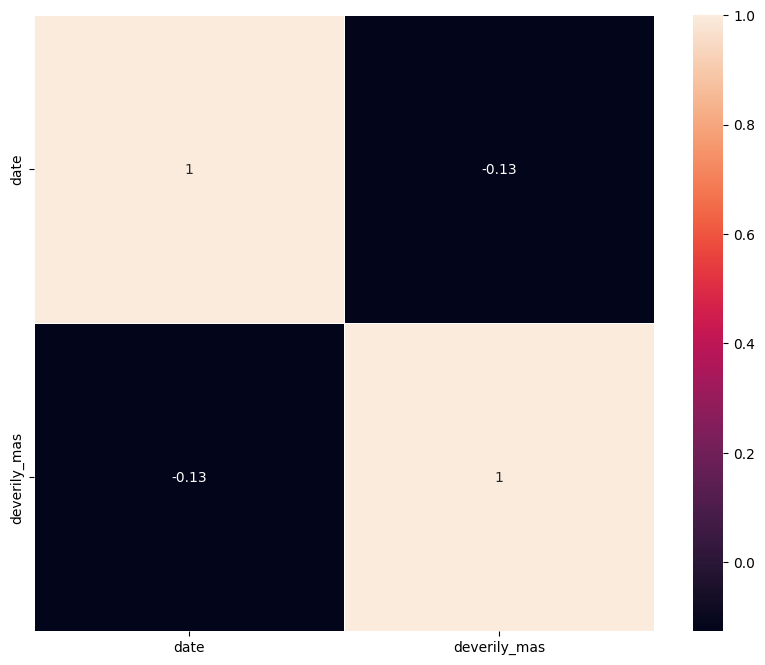

In [391]:
table = data.corr()
table
plt.figure(figsize=(10, 8))
sns.heatmap(table, annot=True, linewidth=0.5)
plt.show()

In [383]:
#devs = []
#for i in dev[index]:
#    devs.append(i)
#id_index = devs[0]
#dever_info = devs[6::2]

In [384]:
#id_index = devs[0]
#dever_info = devs[6::2]

In [ ]:
#d = {'date': mas, 'deverily_mas': dict_of_clients_api[index]}
#df_dict[id_index] = pd.DataFrame(d)

In [389]:
#to_time = lambda x: datetime.datetime.strptime(x, "%Y/%m")
#data['date'] = data['date'].apply(to_time)

In [392]:
#data.index = data['date']
#data = data.drop(['date'], axis = 1)

In [91]:
to_time = lambda x: datetime.datetime.strptime(x, "%Y/%m") #Делаем перевод в datetime
dict_of_clients_api = {}
df_dict = {}
for index in range(13425):
    devirely = ef.iloc[index]
    dev = pd.DataFrame(devirely)
    devs = []
    for i in dev[index]:
        devs.append(i)
    id_index = devs[0]
    dever_info = devs[6::2]
    dict_of_clients_api[id_index] = dever_info
for i in dict_of_clients_api:
    d = {'date': mas, 'deverily_mas': dict_of_clients_api[i]}
    df_dict[i] = pd.DataFrame(d)
    df_dict[i]['date'] = df_dict[i]['date'].apply(to_time)
    df_dict[i].index = df_dict[i]['date']
    df_dict[i] = df_dict[i].drop(['date'], axis = 1)
    df_dict[i] = df_dict[i].sort_index(ascending=True)

#Суть большого куска кода - сделать датасеты для lstm модели для каждого клиента и отслортировать его

In [ ]:
#по итогам попытки обучить модель нет смысла обучать по отдельности, ведь данные не сбалансированные.Будем обьединять их

In [92]:
scaler = StandardScaler()
import tensorflow
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
#Обьединение датасетов в один


In [71]:
#scaler = StandardScaler() # Стандартезируем данные
#data = scaler.fit_transform(df_dict[912])